Problem set 5: Parsing
===========

This problem set contains two parts. 

- ** English Dependency parsing **: design features to learn a high-accuracy dependency parser for the English language
- ** Multilingual Dependency Parsing **: design features to learn a high-accuracy dependency parser for a language other than english of your choice

### Honor policy ###

- Your work must be your own. Do not discuss the details of the assignment with other people. 
- You may of course help each other with understanding the ideas discussed in lecture and the readings, and with basic questions about programming in Python. It is **not acceptable** to discuss how to implement a specific feature for dependency parsing, and it is unacceptable to share your code.
- There are implementations and source code for many machine learning algorithms on the internet. Please write the code for this assignment on your own, without using these external resources, except where noted (usually in the bakeoff only).

# Part 1: English Dependency parsing #

In this problem, you will work with an arc-factored non-projective dependency parser, which is trained by average perceptron. If you were not confident about your own implementation of averaged structure perceptron, please take a look at the code, in the directories shown below.

In [2]:
import numpy as np
from os.path import join
import gtparsing
import gtparsing.dependency_parser as depp
import gtparsing.dependency_features as depf
import gtparsing.custom_features
import gtparsing.utilities
from score import accuracy
%pylab inline
reload(depp)

Populating the interactive namespace from numpy and matplotlib


<module 'gtparsing.dependency_parser' from 'gtparsing/dependency_parser.pyc'>

In [3]:
DIR = "data/deppars/"

In [4]:
# build a dependency parser with a given feature set
dp = depp.DependencyParser(feature_function=depf.DependencyFeatures())
dp.read_data("english")

gtparsing/../data/deppars
Number of sentences: 7569
Number of tokens: 75621
Number of words: 11766
Number of pos: 48
Number of features: 801


In [6]:
# train your parser for ten iterations
# These are *unlabeled* accuracies.
dp.train_perceptron(10)

Epoch 1 Train: 0.435 Dev: 0.427
Epoch 2 Train: 0.440 Dev: 0.436
Epoch 3 Train: 0.440 Dev: 0.453
Epoch 4 Train: 0.441 Dev: 0.455
Epoch 5 Train: 0.440 Dev: 0.456
Epoch 6 Train: 0.440 Dev: 0.460
Epoch 7 Train: 0.440 Dev: 0.462
Epoch 8 Train: 0.442 Dev: 0.461
Epoch 9 Train: 0.440 Dev: 0.464
Epoch 10 Train: 0.441 Dev: 0.462


In file ```parsing/custom_features.py```, you are going to create a series of subclasses of ```DependencyFeatures```, which has features of your choice. We provide an example of one such class ```LexFeats```, which adds a feature that includes:

- The part-of-speech of the head
- The word of the modifier

** Note ** - Please take a careful look at the documentation provided for the class. It should help you design the other classes for the subsequent deliverables.

In [5]:
reload(gtparsing.custom_features)
from gtparsing.custom_features import LexFeats

In [8]:
#let's run it
dp = depp.DependencyParser(feature_function=LexFeats())
dp.read_data("english")
dp.train_perceptron(1)

gtparsing/../data/deppars
Number of sentences: 7569
Number of tokens: 75621
Number of words: 11766
Number of pos: 48
Number of features: 23019
Epoch 1 Train: 0.488 Dev: 0.507


** Deliverable 1a ** (3 points): start by adding a feature that computes the distance between the head and the modifier, up to a maximum absolute value of 10. To do this, implement the code for the class ```LexDistFeats``` in ```gtparsing.custom_features```

**Sanity check**: you should now have 23039 features. Accuracy should improve substantially. 

In [6]:
reload(depp)
reload (gtparsing.custom_features)
from gtparsing.custom_features import LexDistFeats

In [10]:
dp = depp.DependencyParser(feature_function=LexDistFeats())
dp.read_data("english")
dp.train_perceptron(10)
dp.test(join (DIR, "english_dev.conll"), join (DIR, "deliverable1a.conll"))

gtparsing/../data/deppars
Number of sentences: 7569
Number of tokens: 75621
Number of words: 11766
Number of pos: 48
Number of features: 23039
Epoch 1 Train: 0.627 Dev: 0.626
Epoch 2 Train: 0.678 Dev: 0.649
Epoch 3 Train: 0.696 Dev: 0.664
Epoch 4 Train: 0.710 Dev: 0.671
Epoch 5 Train: 0.718 Dev: 0.680
Epoch 6 Train: 0.729 Dev: 0.683
Epoch 7 Train: 0.733 Dev: 0.690
Epoch 8 Train: 0.739 Dev: 0.688
Epoch 9 Train: 0.744 Dev: 0.690
Epoch 10 Train: 0.752 Dev: 0.694
Saved Output to data/deppars/deliverable1a.conll


** Deliverable 1b ** (3 points): now add a feature to LexDistFeats, which includes the POS of the modifier and the word of the head. To do this, implement the code for the class ```LexDistFeats2``` in ```gtparsing.custom_features```

**Sanity check**: The number of features should roughly double. (Do you see why?)

In [7]:
reload (gtparsing.custom_features)
from gtparsing.custom_features import LexDistFeats2

In [6]:
dp = depp.DependencyParser(feature_function=LexDistFeats2())
dp.read_data("english")
dp.train_perceptron(10)
dp.test(join (DIR, "english_dev.conll"), join (DIR, "deliverable1b.conll"))

gtparsing/../data/deppars
Number of sentences: 7569
Number of tokens: 75621
Number of words: 11766
Number of pos: 48
Number of features: 44546
Epoch 1 Train: 0.649 Dev: 0.661
Epoch 2 Train: 0.722 Dev: 0.684
Epoch 3 Train: 0.755 Dev: 0.691
Epoch 4 Train: 0.779 Dev: 0.694
Epoch 5 Train: 0.798 Dev: 0.708
Epoch 6 Train: 0.811 Dev: 0.709
Epoch 7 Train: 0.821 Dev: 0.715
Epoch 8 Train: 0.833 Dev: 0.724
Epoch 9 Train: 0.838 Dev: 0.724
Epoch 10 Train: 0.846 Dev: 0.729
Saved Output to data/deppars/deliverable1b.conll


## Context features ## 

Add context features that consider the tags adjacent to the head and modifier. You may wish to consider various tag combinations, such as 

 - $\langle t[h], t[h-1], t[m]\rangle$: head, head-left, modifier
 - $\langle t[h], t[m], t[m+1]\rangle$: head, modifier, modifier-right
 - $\langle t[h], t[h-1], t[m], t[m+1]\rangle$: head, head-left, modifier, modifier-right
 - etc

Note that you can add more than one feature at a time within ```create_arc_features()```. Watch out for edge cases!

** Deliverable 1c ** (5 points):

Describe what context feature templates you have added. How do they impact the total number of features? How does 
it impact the development and training accuracy?

** Note **- You must atleast add head, head-left, modifier feature

To do this, implement the code for the class ```ContextFeats``` in ```gtparsing.custom_features```

** Sanity check **: I added a few basic context features, and this increased dev set accuracy above 82%.

In [8]:
reload (gtparsing.custom_features)
from gtparsing.custom_features import ContextFeats

In [14]:
dp = depp.DependencyParser(feature_function=ContextFeats())
dp.read_data("english")
dp.train_perceptron(10)
dp.test(join (DIR, "english_dev.conll"), join (DIR, "deliverable1c.conll"))

gtparsing/../data/deppars
Number of sentences: 7569
Number of tokens: 75621
Number of words: 11766
Number of pos: 48
Number of features: 65753
Epoch 1 Train: 0.745 Dev: 0.793
Epoch 2 Train: 0.815 Dev: 0.810
Epoch 3 Train: 0.841 Dev: 0.817
Epoch 4 Train: 0.862 Dev: 0.823
Epoch 5 Train: 0.877 Dev: 0.830
Epoch 6 Train: 0.888 Dev: 0.829
Epoch 7 Train: 0.898 Dev: 0.829
Epoch 8 Train: 0.903 Dev: 0.831
Epoch 9 Train: 0.910 Dev: 0.833
Epoch 10 Train: 0.916 Dev: 0.833
Saved Output to data/deppars/deliverable1c.conll


Add your response to Deliverable 1c here
### Answer to 1c ###
- I added all the three context features mentioned above:
 - $\langle t[h], t[h-1], t[m]\rangle$: head, head-left, modifier
 - $\langle t[h], t[m], t[m+1]\rangle$: head, modifier, modifier-right
 - $\langle t[h], t[h-1], t[m], t[m+1]\rangle$: head, head-left, modifier, modifier-right
 
- These three types of feature increased the size of all features by half of that of LexDistFeats2
- They improve the training accuracy to 91.6% and development accuracy to 83.3%

## Bakeoff! ##

Similar to the previous problem sets, we will have a kaggle competition for this problem set. Two days before the submission, we will release a test data set. Try to develop other features that will further improve performance. Please explain all the features that you have. We will provide the submission function through piazza.

After identifying your best feature set, run *test()* function from DependencyParser. Please name the file as **lastname-firstname.conll.pred**.

**Deliverable 1d** (4 points): Explain why the features you added would work and include your response file in your t-square submission.

**Sanity check / challenge**: The best test set performance in Fall 2014 was 86.5%. Can you beat it??

**NOTE**: As usual, you are not supposed to look at other code online while doing this problem set. However, you are welcome to search for *research papers* on dependency parsing to get ideas for features that might improve your performance.

### Answer to 1d ###
I used the feature set defined by ```ContextFeats``` in part 1c. As stated in the answer to 1c, I added context features of adjacent pos tags of head and modifier. 
    
These features couple the phrase structural information, as used in HMM algorithm, into other lexical features. POS tag phrase structure can provide significantly more information to remove the disambiguity in some cases. Especially when determining which word is head and which word is modifier, these features are very effective. For example normally if we have a verb followed by a noun, the verb is much more likely to the head, which can be well captured by POS tags of adjacents words.

In [18]:
#Uncomment the line below and modify it so that the filename is lastname-firstname.conll.pred
DELIVERABLE1d = join (DIR, "shi-chao.conll.pred")

In [20]:
# run this when you have trained on your best features. 
dp.test(join (DIR, "english_test.conll"), DELIVERABLE1d)

Saved Output to data/deppars/shi-chao.conll.pred


# Part 2: Multilingual Dependency parsing #

In this part, you will do a series of tasks:

- **Delexicalized direct transfer learning**. This means training a parser without lexical features, and directly porting it to another languag, without retraining.
- Retrain the delexicalized parser in the target language.
- Train a lexicalized parser in the target language.

** Note ** - Running each part of this section can be slow, so make sure you start early if you want to finish in time.

First, you choose which target language you want to work with. Uncomment the line from the following cell depending on the language you choose.

In [9]:
#TARGET_LANGUAGE = "german"
TARGET_LANGUAGE = "french"
#TARGET_LANGUAGE = "italian"
#TARGET_LANGUAGE = "spanish"
#TARGET_LANGUAGE = "portuguese"

To get us started, we warmup by comparing the probability distributions of part of speech tags for two different datasets.

- In part 1, you used the dataset identified by "english" language. 
- The same data is also available for "english_univtags" language. 
- The difference is in the size of the tagset, where the size is smaller in english_univtags. The tagset is chosen such that it has _universal_ applicability to multiple languages. Effectively, the tagging is much more coarse grained in english_univtags than in english.

** Deliverable 2a ** (3 points): Calculate the conditional probability distribution of modifier PoS tag given head PoS tag i.e $P(\text{modifier tag}=n \mid \text{head tag}=m), \forall n \in T$, where $T$ is the tagset.  In order to do this, implement the ```CPT``` function in ```gtparsing.utilities```, which should take as arguments a list of instances and the tag index representing the head of a dependency relation, and should return a dict of probabilities of the tags of the modifiers.

Use this function to calculate the conditional probability distributions where the head tag is verb for "english" and "english_univtags" datasets.

In [22]:
reload (gtparsing.utilities)
from gtparsing.utilities import CPT

In [23]:
dp = depp.DependencyParser(feature_function=depf.DependencyFeatures())
dp.read_data("english")
eng_tag_dist = CPT(dp.reader.train_instances, dp.reader.pos_dict["VB"])
eng_reverse_lookup = {value:key for key,value in dp.reader.pos_dict.iteritems()}

gtparsing/../data/deppars
Number of sentences: 7569
Number of tokens: 75621
Number of words: 11766
Number of pos: 48
Number of features: 801


In [25]:
dp = depp.DependencyParser(feature_function=depf.DependencyFeatures())
dp.read_data("english_univtags")
eng_univ_tag_dist = CPT(dp.reader.train_instances, dp.reader.pos_dict["VERB"])
eng_univ_reverse_lookup = {value:key for key,value in dp.reader.pos_dict.iteritems()}

gtparsing/../data/deppars
Number of sentences: 7569
Number of tokens: 75621
Number of words: 11766
Number of pos: 15
Number of features: 142


The following code plots the distributions.

In [26]:
def plot_dist (values, labels):
    WIDTH = 0.35
    f = figure (figsize = (10,5))
    ax = f.add_subplot (111)
    ax.bar (np.arange (len(values)),values)
    xticks (np.arange (len (values)) + WIDTH, labels, rotation=45)

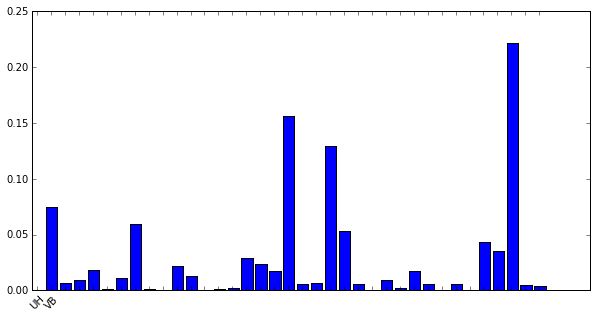

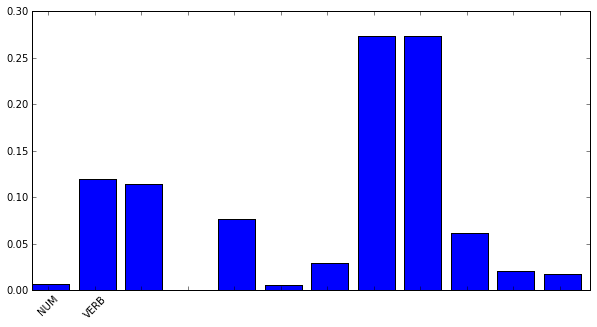

In [29]:
plot_dist (eng_tag_dist.values(), [eng_reverse_lookup[tag_index] for tag_index in eng_tag_dist.keys()[0]])
plot_dist (eng_univ_tag_dist.values(), [eng_univ_reverse_lookup[tag_index] for tag_index in eng_univ_tag_dist.keys()[0]])

** Deliverable 2b ** (3 points) : Now calculate the [entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory) of each of the distribution. How are the two distributions different? 

In order to do this, you will implement ```entropy``` function ```gtparsing.utilities``` module 

In [30]:
reload (gtparsing.utilities)
from gtparsing.utilities import entropy

In [31]:
print entropy (eng_tag_dist)
print entropy (eng_univ_tag_dist)

-3.82695524612
-2.74125094813


** Deliverable 2c ** (3 points) Implement ```DelexicalizedFeats``` in ```gtparsing/custom_features```. You should have the following features:

- part of speech tag of the head and modifier pair
- distance between the head and the modifier upto a maximum absolute value of 10

Train the dependency parser on ** english_univtags ** and transfer learning to the target language.

In [32]:
reload (gtparsing.custom_features)
from gtparsing.custom_features import DelexicalizedFeats

In [33]:
# training on english
dp = depp.DependencyParser(feature_function=DelexicalizedFeats())
dp.read_data("english_univtags")
dp.train_perceptron(10)
dp.test(join (DIR, TARGET_LANGUAGE+"_dev.conll"), join (DIR, TARGET_LANGUAGE + ".deliverable2c.conll"))
print "Accuracy:", accuracy(join (DIR, TARGET_LANGUAGE+"_dev.conll"), join (DIR, TARGET_LANGUAGE + ".deliverable2c.conll"))

gtparsing/../data/deppars
Number of sentences: 7569
Number of tokens: 75621
Number of words: 11766
Number of pos: 15
Number of features: 874
Epoch 1 Train: 0.668 Dev: 0.695
Epoch 2 Train: 0.673 Dev: 0.707
Epoch 3 Train: 0.674 Dev: 0.699
Epoch 4 Train: 0.674 Dev: 0.706
Epoch 5 Train: 0.672 Dev: 0.703
Epoch 6 Train: 0.674 Dev: 0.705
Epoch 7 Train: 0.674 Dev: 0.708
Epoch 8 Train: 0.674 Dev: 0.710
Epoch 9 Train: 0.675 Dev: 0.705
Epoch 10 Train: 0.673 Dev: 0.702
Saved Output to data/deppars/french.deliverable2c.conll
Accuracy: 0.489772490086
0.489772490086


** Deliverable 2d **(3 points) Train the delexicalized parser in the target language. 

* Find the worst predicted label i.e the label for which the parser makes the most mistakes.
* Find the best predicted label ie. the label for which the parser makes the least mistakes,

In order to do this you may want to compare the predictions to the true labels by calculating the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

In [34]:
dp = depp.DependencyParser(feature_function=DelexicalizedFeats())
dp.read_data(TARGET_LANGUAGE)
dp.train_perceptron(10)
dp.test(join (DIR, TARGET_LANGUAGE+"_dev.conll"), join (DIR, TARGET_LANGUAGE + ".deliverable2d.conll"))

gtparsing/../data/deppars
Number of sentences: 14511
Number of tokens: 351233
Number of words: 41385
Number of pos: 14
Number of features: 1260
Epoch 1 Train: 0.596 Dev: 0.580
Epoch 2 Train: 0.600 Dev: 0.581
Epoch 3 Train: 0.599 Dev: 0.612
Epoch 4 Train: 0.600 Dev: 0.602
Epoch 5 Train: 0.599 Dev: 0.601
Epoch 6 Train: 0.600 Dev: 0.601
Epoch 7 Train: 0.600 Dev: 0.596
Epoch 8 Train: 0.599 Dev: 0.596
Epoch 9 Train: 0.599 Dev: 0.596
Epoch 10 Train: 0.598 Dev: 0.598
Saved Output to data/deppars/french.deliverable2d.conll


### Answer to 2d: ###
 - The cell below computes the confusion matrix and finds the top 10 worst predicted labels and top 18 best predicted label. Because there 18 labels that only makes one mistake.
 - From the last two print statements we see that the top 3 worst predicted(in terms of number of errors rather than the error rate) label is NOUN tagged as VERB, VERB being tagged as NOUN, and VERB tagged as ADP

In [108]:
f_dev = open(DIR+TARGET_LANGUAGE+'_dev.conll')
ddevs = []
ddev = []
for line in f_dev:
    if len(line.split()) == 0:
        ddevs.append(np.array([np.array(ddev)[:,3],np.array(ddev)[:,6]]))
        ddev = []
        continue
    ddev.append(line.split())
f_dev.close()

f_prd = open(DIR+TARGET_LANGUAGE+'.deliverable2d.conll')
dprds = []
dprd = []
for line in f_prd:
    if len(line.split()) == 0:
        dprds.append(np.array([np.array(dprd)[:,3],np.array(dprd)[:,6]]))
        dprd = []
        continue
    dprd.append(line.split())
f_prd.close()

htag_dev = []
htag_prd = []
def dec1(x):
    return x-1
for i in range(len(ddevs)):
    htag_dev.append(np.array(ddevs[i][0,:][map(dec1,map(int,ddevs[i][1,:]))]))
    htag_prd.append(np.array(dprds[i][0,:][map(dec1,map(int,dprds[i][1,:]))]))

from collections import Counter
confusion = Counter()                  # confusion matrix, here I only count the number of errors, which means
for i in range(len(htag_dev)):         # I use the number of errors of a tag instead of accuracy as a measure.
    if np.any(htag_dev[i] != htag_prd[i]):
        ierrs = np.where(htag_dev[i]!=htag_prd[i])[0]
        for ierr in ierrs:
            confusion[(htag_dev[i][int(ierr)],htag_prd[i][int(ierr)])] += 1
import operator
# print worst predicted and best predicted labels.
print sorted(confusion.items(), key=operator.itemgetter(1))[-10:][::-1]
print sorted(confusion.items(), key=operator.itemgetter(1))[:18]

[(('NOUN', 'VERB'), 2274), (('VERB', 'NOUN'), 1868), (('VERB', 'ADP'), 857), (('NOUN', 'ADP'), 812), (('NOUN', '.'), 630), (('ADP', 'NOUN'), 613), (('VERB', '.'), 600), (('ADP', 'VERB'), 460), (('ADJ', 'NOUN'), 152), (('ADJ', 'VERB'), 149)]
[(('ADJ', 'PRT'), 1), (('CONJ', 'PRON'), 1), (('PRON', 'ADV'), 1), (('CONJ', 'ADJ'), 1), (('CONJ', 'X'), 1), (('NUM', 'X'), 1), (('PRT', 'X'), 1), (('PRT', 'ADJ'), 1), (('.', 'ADV'), 1), (('NUM', 'ADJ'), 1), (('X', 'ADV'), 1), (('VERB', 'DET'), 1), (('PRON', 'DET'), 1), (('DET', 'NUM'), 1), (('ADJ', 'PRON'), 1), (('.', 'PRT'), 1), (('ADV', '.'), 1), (('ADV', 'X'), 1)]


**Deliverable 2e** (3 points) Now train the parser for 10 iterations by adding lexical features. You should also use the delexicalized and distance features. Explain the following:

* Have the mistakes for the worst predicted label from 2d gone down? 
* Give top 3 worst predicted labels and top 3 best predicted labels. 

In [ ]:
reload(gtparsing.custom_features)
from gtparsing.custom_features import RelexicalizedFeats
dp = depp.DependencyParser(feature_function=RelexicalizedFeats()) # Make appropriate call here
dp.read_data(TARGET_LANGUAGE)
dp.train_perceptron(10)
dp.test(join (DIR, TARGET_LANGUAGE+"_dev.conll"), join (DIR, TARGET_LANGUAGE + ".deliverable2e.conll"))

gtparsing/../data/deppars
Number of sentences: 14511
Number of tokens: 351233
Number of words: 41385
Number of pos: 14
Number of features: 60820
Epoch 1 Train: 0.634 Dev: 0.626
Epoch 2 Train: 0.647 Dev: 

** Deliverable 2f** (6 points) Train the parser for 10 iterations to improve the accuracy of the parser by at least 3%. Include at least one context feature and one morphological feature. The morphological features should access the words themselves; this is possible using the ```self.word_dict``` member variable of ```dependency_features```. Try to include more than one feature of each kind. Explain what features you added.

In [ ]:
dp = depp.DependencyParser(feature_function=) # Make appropriate call here
dp.read_data(TARGET_LANGUAGE)
dp.train_perceptron(10)
dp.test(join (DIR, TARGET_LANGUAGE+"_dev.conll"), join (DIR, TARGET_LANGUAGE + ".deliverable2f.conll"))

# Part 3: 7650 Only #

- This is more research-oriented than in previous assignments. Be prepared to read and to think!
- [Hohensee and Bender](http://aclweb.org/anthology/N/N12/N12-1032.pdf) show that features measuring morphological  agreement can significantly improve dependency parsing.
- For your target language, read about morphology in your chosen target language.
- Design a set of features that capture morphological agreement between the head and the modifier. These features can condition on the part-of-speech, but they need to take the morphology into account too. For example, in English, you might want to capture subject-verb agreement. To do this you could design the following features:
    - < pos(h) = V, pos(m) = N, head verb is third-person singular, modifier noun is third-person singular>
    - < pos(h) = V, pos(m) = N, head verb is not third-person singular, modifier noun is plural>
    - etc
- In the example above, you could use simple morphology to distinguish whether the noun is plural and whether the verb agrees, for example by checking for 's' at the end of each word.
- If you can find existing resources (dictionaries or code) that capture morphology of interest for your targeted language, you may use them.

**Deliverable 3** (8 points) 

- Explain the morphological agreement that your features are trying to capture.
- Explain how you try to implement morphological agreement as a feature.
- Test whether your feature improves performance.